In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns   

#read observation data
obs_data = pd.read_csv("observations.csv")
#read species data  
species_data = pd.read_csv("species_info.csv")


all_data = pd.merge(obs_data, species_data, on = "scientific_name", how = "left")
print(all_data.head())

clean_observations = all_data["observations"].dropna()
clean_conser = all_data["conservation_status"].dropna()
#observations corrlation with conservation status


            scientific_name                            park_name  \
0        Vicia benghalensis  Great Smoky Mountains National Park   
1            Neovison vison  Great Smoky Mountains National Park   
2         Prunus subcordata               Yosemite National Park   
3      Abutilon theophrasti                  Bryce National Park   
4  Githopsis specularioides  Great Smoky Mountains National Park   

   observations        category                        common_names  \
0            68  Vascular Plant  Purple Vetch, Reddish Tufted Vetch   
1            77          Mammal                       American Mink   
2           138  Vascular Plant                        Klamath Plum   
3            84  Vascular Plant                          Velvetleaf   
4            85  Vascular Plant                      Common Bluecup   

  conservation_status  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  


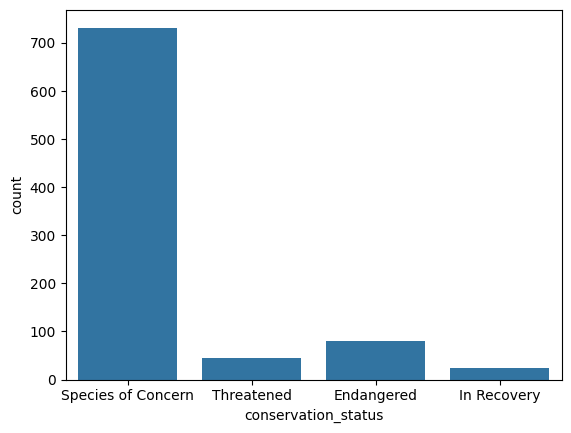

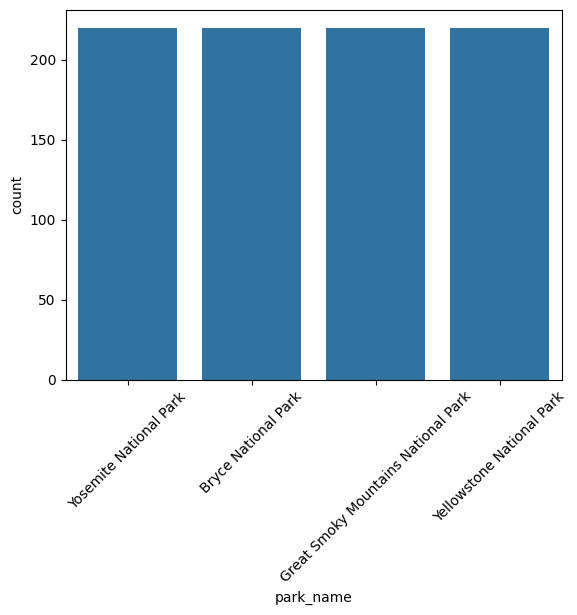

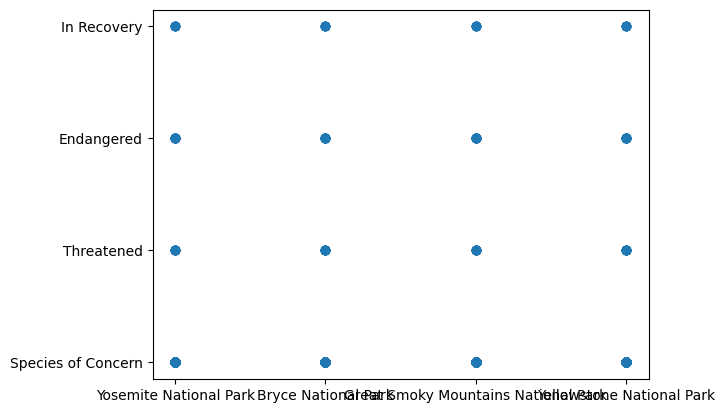

In [50]:
#Conservation Stats VS Park Name

park_names = all_data.park_name.unique()

CS_PN = pd.DataFrame()
CS_PN = all_data[["park_name", "conservation_status"]]
CS_PN = CS_PN.dropna()

sns.countplot(data = CS_PN, x = "conservation_status")

plt.show()
plt.clf()
sns.countplot(CS_PN, x = "park_name")
plt.xticks(rotation = 45)
plt.show()
plt.clf()

plt.scatter(CS_PN["park_name"], CS_PN["conservation_status"])
plt.show()
